# Основные библиотеки Python для анализа данных. Линейная регрессия.
В этой тетрадке мы познакомимся с базовыми библиотеками для анализа данных на примере задачи прогнозирования роста человека по его весу.

## Анализ данных c Pandas

Сперва импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

%matplotlib inline

Считаем данные по росту и весу (weights_heights.csv, приложенный в задании) в объект Pandas DataFrame:

In [50]:
df1 = pd.read_csv('./data/trainingData_tabular_chunk1.csv')

Посмотрим какую размерность имеют данные и посмотрим первые несколько записей

In [51]:
df1.head()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,opponent.fatigue_damage,opponent.hand_count,opponent.played_minions_count,player.armor,player.attack,player.hero_card_id,player.hp,player.special_skill_used,player.weapon_durability,player.crystals_all,player.crystals_current,player.deck_count,player.fatigue_damage,player.hand_count,player.played_minions_count,opponent.played.nOfCards,opponent.played.attack,opponent.played.crystals_cost,opponent.played.hp_current,opponent.played.hp_max,player.played.nOfCards,player.played.attack,player.played.crystals_cost,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
0,4687346,1,14,0,0,798,5,0,0,10,10,11,0,2,1,0,0,981,17,1,0,10,0,12,0,5,5,1,2,4,6,8,5,21,20,20,23,4,0,1,5,0,20,22,17
1,3270826,1,7,0,0,754,22,0,0,6,6,19,0,8,1,0,0,754,29,0,0,7,0,18,0,7,5,1,2,4,2,4,5,10,16,16,17,3,2,2,7,0,17,26,20
2,3189487,1,5,3,0,612,29,0,0,4,1,22,0,4,2,1,0,612,30,0,0,6,5,22,0,5,0,2,8,5,8,8,0,0,0,0,0,5,0,0,5,2,26,28,27
3,4098946,1,8,0,0,390,26,0,0,7,7,17,0,7,0,0,0,981,26,0,0,8,8,19,0,9,1,0,0,0,0,0,1,3,2,2,2,7,1,1,9,9,36,44,36
4,2661127,0,13,0,0,25,30,0,0,10,1,12,0,3,4,0,0,494,8,0,0,10,10,14,0,4,1,4,15,14,16,16,1,6,6,7,7,4,0,0,4,4,13,13,14


Колонок слишком много и некоторые не поместились - это можно исправить в настройках pandas

In [56]:
pd.options.display.max_columns = 60
df1.sort_values(by=['gamestate_id'], inplace=True)
df1[df1['gamestate_id']==1000009]

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,opponent.fatigue_damage,opponent.hand_count,opponent.played_minions_count,player.armor,player.attack,player.hero_card_id,player.hp,player.special_skill_used,player.weapon_durability,player.crystals_all,player.crystals_current,player.deck_count,player.fatigue_damage,player.hand_count,player.played_minions_count,opponent.played.nOfCards,opponent.played.attack,opponent.played.crystals_cost,opponent.played.hp_current,opponent.played.hp_max,player.played.nOfCards,player.played.attack,player.played.crystals_cost,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
265653,1000009,1,11,0,0,981,9,0,0,10,0,14,0,4,2,0,0,390,10,0,0,10,5,12,0,2,2,2,6,6,8,8,2,11,11,9,11,2,0,0,2,1,9,9,8


In [6]:
!head ./data/trainingData_JSON_chunk1.json

'head' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import json
import pprint
import os
from tqdm import tqdm

In [27]:
df_cards = []
for name in os.listdir("data/"):
    if name.endswith(".json"):
        with open('data/' + name) as fin:
            for record in tqdm(map(json.loads, fin)):
                for card in record['player'].get('hand', []):
                    card['turn'] = record['turn']
                    card['gamestate_id'] = record['gamestate_id']
                    card['hero'] = record['player']['hero']['hero_card_id']
                    df_cards.append(card)
df = pd.DataFrame.from_records(df_cards)

500000it [00:34, 14625.50it/s]


# Упражнения 
## 1
Приведите таблицу со следующими статистиками от таблицы: 
    
    count, mean, std, min, Перцентели: 25%, 50%, 75%, 90%, max 

    Исключите поля gamestate_id, decision, так как они являются техническими.

    Решение должно быть одной строкой

In [30]:
df.drop(columns=['gamestate_id']).describe()

,attack,crystals_cost,hp,id,turn,hero,durability
count,1.771078e+06,2.304421e+06,1.686066e+06,2.304421e+06,2.304421e+06,2.304421e+06,85012.000000
mean,3.852464e+00,4.067876e+00,4.462430e+00,9.808604e+02,8.278902e+00,6.426432e+02,2.624453
std,1.603976e+00,1.777453e+00,1.849096e+00,6.811066e+02,4.095974e+00,3.494297e+02,0.926809
min,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00,2.500000e+01,2.000000
25%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+02,5.000000e+00,3.900000e+02,2.000000
50%,3.000000e+00,4.000000e+00,5.000000e+00,1.038000e+03,8.000000e+00,6.120000e+02,2.000000
75%,6.000000e+00,6.000000e+00,6.000000e+00,1.608000e+03,1.100000e+01,7.980000e+02,4.000000
max,8.000000e+00,8.000000e+00,8.000000e+00,2.154000e+03,3.000000e+01,1.235000e+03,4.000000


## 2
Сделать таблицу матчапов 9х9 где по обоим осям названия героев а в ячейке i, j - процент побед(средний decision) героя i против героя j

In [36]:
df

,attack,charge,crystals_cost,forgetful,freezing,hp,id,name,poisonous,shield,stealth,taunt,type,windfury,turn,gamestate_id,hero,durability,freeze
0,5.0,False,7,False,False,6.0,2137,Guardian of Kings,False,False,False,False,MINION,False,14,4687346,981,NaN,NaN
1,2.0,False,2,False,False,1.0,1902,Murloc Tidehunter,False,False,False,False,MINION,False,14,4687346,981,NaN,NaN
2,4.0,NaN,4,False,NaN,NaN,172,Truesilver Champion,NaN,NaN,NaN,NaN,WEAPON,NaN,14,4687346,981,2.0,False
3,3.0,False,2,False,False,2.0,1155,Acidic Swamp Ooze,False,False,False,False,MINION,False,14,4687346,981,NaN,NaN
4,6.0,False,7,False,False,6.0,300,Stormwind Champion,False,False,False,False,MINION,False,14,4687346,981,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304416,3.0,False,2,False,False,2.0,1155,Acidic Swamp Ooze,False,False,False,False,MINION,False,8,2886512,494,NaN,NaN
2304417,NaN,NaN,7,NaN,NaN,NaN,1694,Flamestrike,NaN,NaN,NaN,NaN,SPELL,NaN,8,2886512,494,NaN,NaN
2304418,3.0,False,2,False,False,2.0,1155,Acidic Swamp Ooze,False,False,False,False,MINION,False,8,2886512,494,NaN,NaN
2304419,6.0,False,6,False,False,7.0,1038,Boulderfist Ogre,False,False,False,False,MINION,False,8,2886512,494,NaN,NaN


In [55]:
df[df['gamestate_id']==1000009]

,attack,charge,crystals_cost,forgetful,freezing,hp,id,name,poisonous,shield,stealth,taunt,type,windfury,turn,gamestate_id,hero,durability,freeze
1224428,3.0,False,3,False,False,2.0,1717,Shattered Sun Cleric,False,False,False,False,MINION,False,11,1000009,390,NaN,NaN
1224429,6.0,False,6,False,False,6.0,1977,Dread Infernal,False,False,False,False,MINION,False,11,1000009,390,NaN,NaN


In [46]:
len(set(df['name']))

78

In [47]:
len(set(df['id']))

78

## 3
По каждой уникальной карте сделать таблицу с полями: 

    name poisonous shield stealth taunt type windfury hero_name
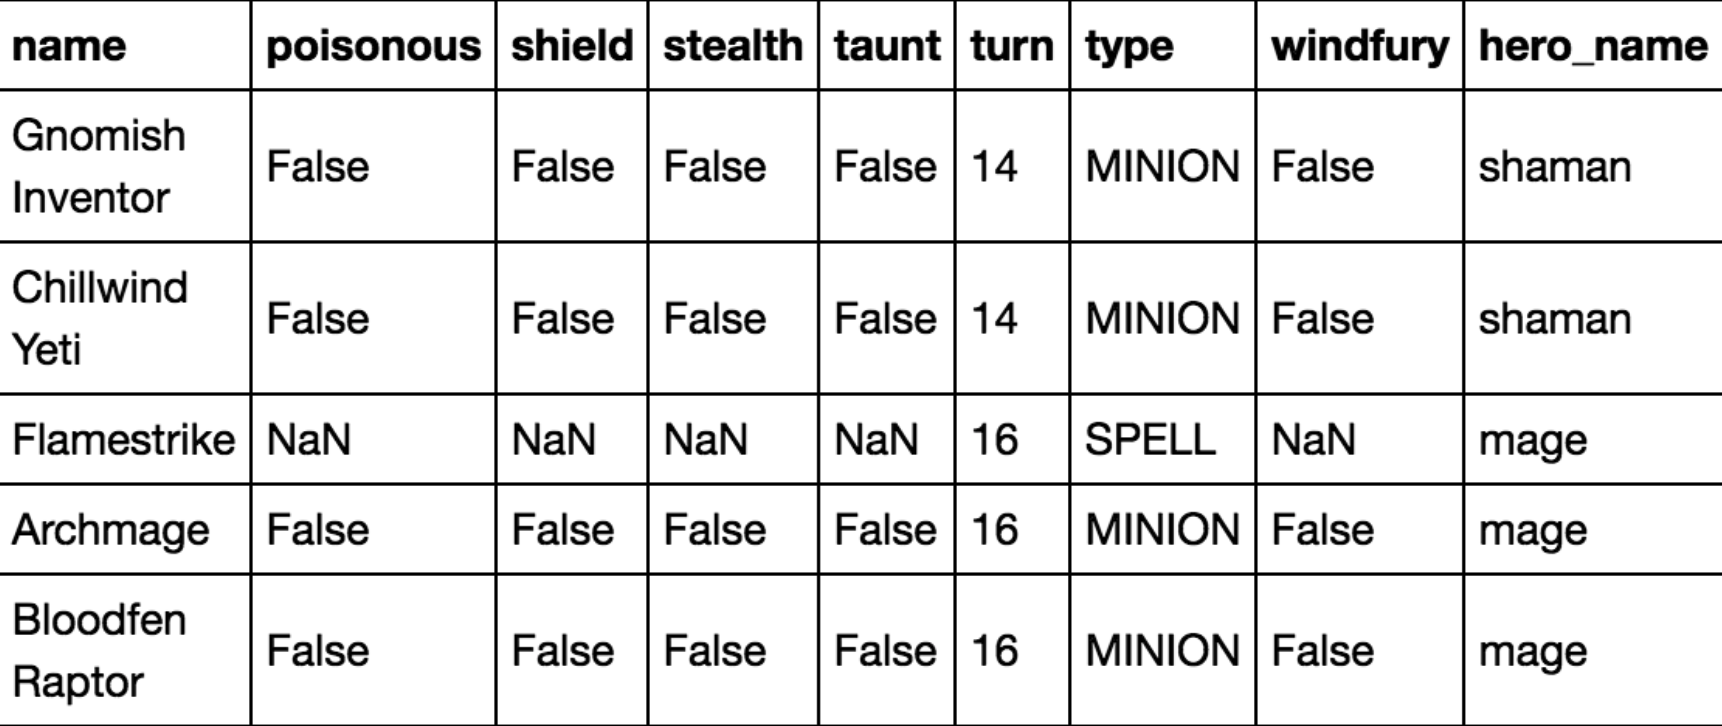

## 4
Посчитать средний винрейт(средний decision) по каждой карте (среди колод, где данная карта присутствует)